In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px

In [2]:
# import datasets
activity = pd.read_csv('/Users/Work/Documents/BellaBeat_case_study/fitbit_datasets/dailyActivity_merged.csv')
steps = pd.read_csv('/Users/Work/Documents/BellaBeat_case_study/fitbit_datasets/dailySteps_merged.csv')
hourly_steps = pd.read_csv('/Users/Work/Documents/BellaBeat_case_study/fitbit_datasets/hourlySteps_merged.csv')
hourly_calories = pd.read_csv('/Users/Work/Documents/BellaBeat_case_study/fitbit_datasets/hourlyCalories_merged.csv')
hourly_intensities = pd.read_csv('/Users/Work/Documents/BellaBeat_case_study/fitbit_datasets/hourlyIntensities_merged.csv')

In [3]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
# Convert 'ActivityDate' to datetime format
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])

# Create new column 'DayOfWeek' from 'ActivityDate' 
activity['DayOfWeek'] = activity['ActivityDate'].dt.day_name()

# Create 'TotalMinutes' containing the sum of active and sedentary minutes
activity['TotalMins'] = activity['VeryActiveMinutes'] + activity['FairlyActiveMinutes'] + activity['LightlyActiveMinutes'] + activity['SedentaryMinutes']

# create new column *Total_Hours* by converting to hour and round float to two decimal places
activity["TotalHours"] = round(activity["TotalMins"] / 60)

In [5]:
activity.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMins,TotalHours
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283


In [6]:
# activity has 33 unique id's which represents 33 different participants for the fitbit data usage
# there are no nulls in the dataframe
# the average Calories burned is 2,303.6, the average TotalSteps is 7,637.9
# avg sedentaryActive is 21.164894, avg fairlyActive is 13.564894, lightlyActive is 192.812766 and sedentary is 991.210638
# most of the users are not active

In [7]:
activity.nunique()

Id                           33
ActivityDate                 31
TotalSteps                  842
TotalDistance               615
TrackerDistance             613
LoggedActivitiesDistance     19
VeryActiveDistance          333
ModeratelyActiveDistance    211
LightActiveDistance         491
SedentaryActiveDistance       9
VeryActiveMinutes           122
FairlyActiveMinutes          81
LightlyActiveMinutes        335
SedentaryMinutes            549
Calories                    734
DayOfWeek                     7
TotalMins                   301
TotalHours                   23
dtype: int64

In [8]:
activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
DayOfWeek                   0
TotalMins                   0
TotalHours                  0
dtype: int64

In [9]:
print("Number of duplicates in activity:", activity.duplicated())

Number of duplicates in activity: 0      False
1      False
2      False
3      False
4      False
       ...  
935    False
936    False
937    False
938    False
939    False
Length: 940, dtype: bool


In [10]:
# there are 33 unique entries for Id which reflects the 33 different participants 
# no nulls present 
# no duplicates
# 31 unique entries for ActivityDate which represents 31 days of data

In [11]:
hourly_calories.head(1)

,Id,ActivityHour,Calories
0,1503960366,3/12/2016 12:00:00 AM,48


In [12]:
hourly_intensities.head(1)

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,3/12/2016 12:00:00 AM,0,0.0


In [13]:
hourly_steps.head(1)

,Id,ActivityHour,StepTotal
0,1503960366,3/12/2016 12:00:00 AM,0


In [14]:
print("Number of unique entries for 'Id' in hourly_calories:", hourly_calories['Id'].nunique())
print("Number of unique entries for 'Id' in hourly_steps:", hourly_steps['Id'].nunique())
print("Number of unique entries for 'Id' in hourly_intensities:", hourly_intensities['Id'].nunique())

Number of unique entries for 'Id' in hourly_calories: 34
Number of unique entries for 'Id' in hourly_steps: 34
Number of unique entries for 'Id' in hourly_intensities: 34


In [15]:
print("Number of duplicates for 'Id' in hourly_calories:", hourly_calories.duplicated())
print("Number of duplicates for 'Id' in hourly_steps:", hourly_steps.duplicated())
print("Number of duplicates for 'Id' in hourly_intensities:", hourly_intensities.duplicated())

Number of duplicates for 'Id' in hourly_calories: 0        False
1        False
2        False
3        False
4        False
         ...  
24079    False
24080    False
24081    False
24082    False
24083    False
Length: 24084, dtype: bool
Number of duplicates for 'Id' in hourly_steps: 0        False
1        False
2        False
3        False
4        False
         ...  
24079    False
24080    False
24081    False
24082    False
24083    False
Length: 24084, dtype: bool
Number of duplicates for 'Id' in hourly_intensities: 0        False
1        False
2        False
3        False
4        False
         ...  
24079    False
24080    False
24081    False
24082    False
24083    False
Length: 24084, dtype: bool


In [16]:
# hourly dataframes have the same unique number of 'Id' 34
# no duplicates 
# all 3 dataframes share the same 'Id' and 'ActivityHour' column
# will merge all 3 into a single dataframe called hourly_merged

In [17]:
hourly_merged = pd.merge(hourly_calories, hourly_steps, on=['Id', 'ActivityHour'])
hourly_merged = pd.merge(hourly_merged, hourly_intensities, on=['Id', 'ActivityHour'])
hourly_merged.head(1)

,Id,ActivityHour,Calories,StepTotal,TotalIntensity,AverageIntensity
0,1503960366,3/12/2016 12:00:00 AM,48,0,0,0.0


In [18]:
hourly_merged.isnull().sum()

Id                  0
ActivityHour        0
Calories            0
StepTotal           0
TotalIntensity      0
AverageIntensity    0
dtype: int64

In [19]:
# create a new column 'Hour' and 'DayOfWeek' from 'ActivityHour'
hourly_merged['ActivityHour'] = pd.to_datetime(hourly_merged['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
hourly_merged['Hour'] = hourly_merged['ActivityHour'].dt.hour
hourly_merged['DayOfWeek'] = hourly_merged['ActivityHour'].dt.strftime('%A')
hourly_merged.head(1)

,Id,ActivityHour,Calories,StepTotal,TotalIntensity,AverageIntensity,Hour,DayOfWeek
0,1503960366,2016-03-12,48,0,0,0.0,0,Saturday


In [20]:
hourly_merged.describe()

,Id,ActivityHour,Calories,StepTotal,TotalIntensity,AverageIntensity,Hour
count,2.408400e+04,24084,24084.000000,24084.000000,24084.000000,24084.000000,24084.000000
mean,4.889424e+09,2016-03-27 05:47:23.198804224,94.266692,286.218693,10.826316,0.180439,11.422064
min,1.503960e+09,2016-03-12 00:00:00,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2.347168e+09,2016-03-19 14:00:00,61.000000,0.000000,0.000000,0.000000,5.000000
50%,4.558610e+09,2016-03-27 04:00:00,77.000000,10.000000,1.000000,0.016667,11.000000
75%,6.962181e+09,2016-04-03 20:00:00,104.000000,289.000000,14.000000,0.233333,17.000000
max,8.877689e+09,2016-04-12 10:00:00,933.000000,10565.000000,180.000000,3.000000,23.000000
std,2.421566e+09,NaN,59.395711,664.924224,20.314312,0.338572,6.927324


In [21]:
# average Calories burned hourly is 94.2 per hour
# average StepTotal is 286.2 per hour
# average TotalIntensity is 10.8 minutes per hour

In [22]:
# analyze data

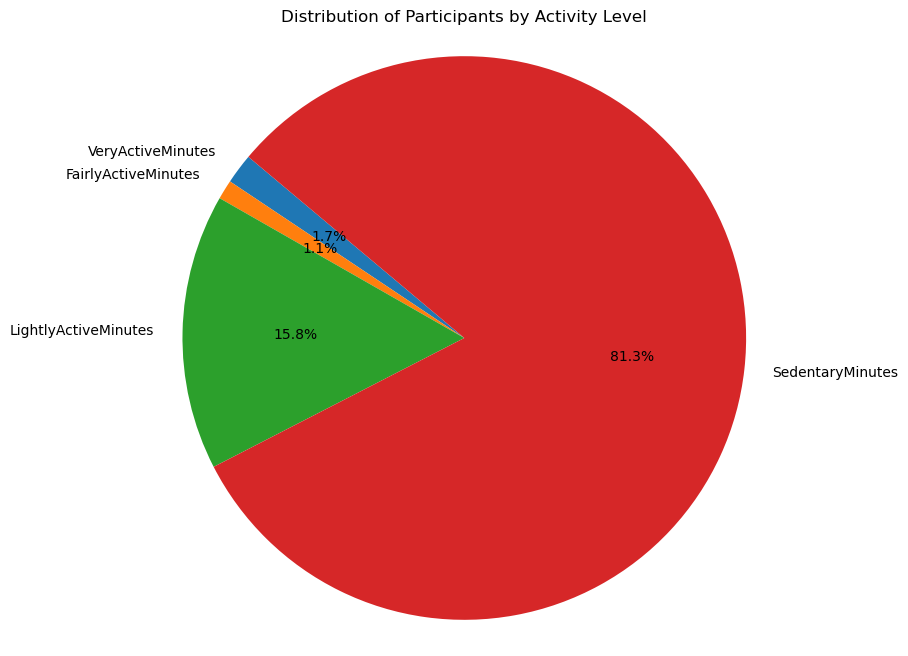

In [23]:
# Calculate the total minutes spent in each activity level across all participants
activity_totals = activity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(activity_totals, labels=activity_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Participants by Activity Level')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()

In [24]:
# majority of users are NOT active
# 15.8% of users are lightly active 
# only 1.7% of users are very active
# this shows that either the app is rarely being used to track fitness or is being used to track inactive movements such as daily habits and not exercise

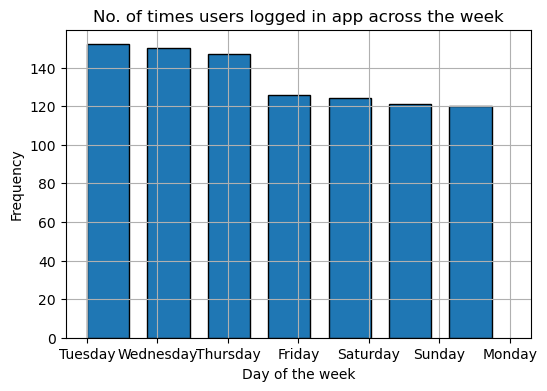

In [25]:
# plotting histogram
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(activity.DayOfWeek, bins = 7, 
         width = 0.6, edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.show()

In [26]:
# participants use the  fitbit more during the mid week
# usage drops at the start of weekend
# this shows participants are not focused on logging into the app during their days off from work
# shows that fitbit is used more ofter during the work week, commutes and daily habits

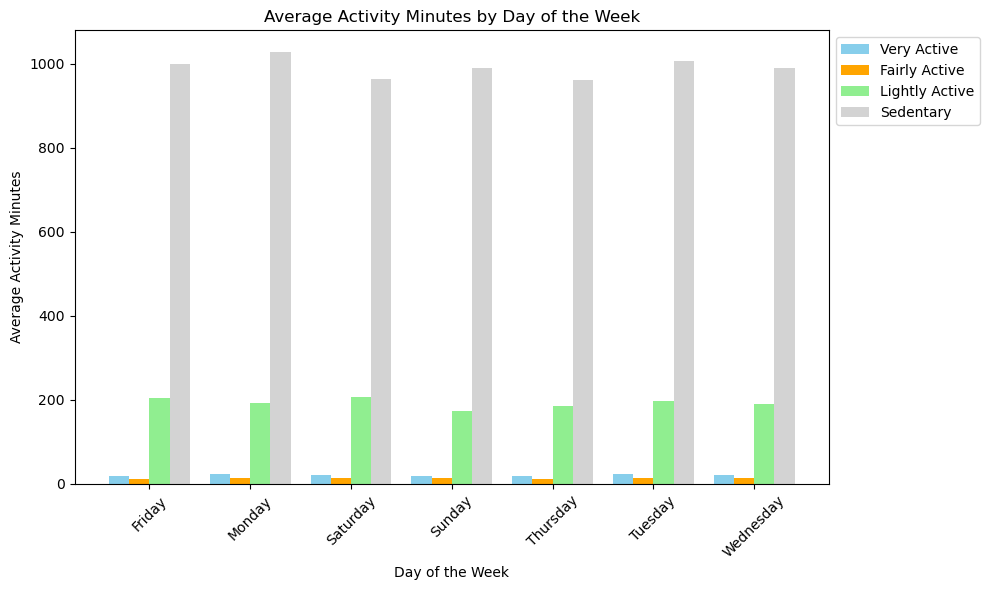

In [27]:
# Group by 'DayOfWeek' and calculate the average activity minutes
avg_activity = activity.groupby('DayOfWeek').agg({
    'VeryActiveMinutes': 'mean',
    'FairlyActiveMinutes': 'mean',
    'LightlyActiveMinutes': 'mean',
    'SedentaryMinutes': 'mean'
}).reset_index()

# Define the order of weekdays
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert 'DayOfWeeek' column to categorical with specified order
avg_activity['DayOfWeek'] = pd.Categorical(avg_activity['DayOfWeek'], categories=weekday_order, ordered=True)

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.2
index = avg_activity.index

plt.bar(index - 1.5 * bar_width, avg_activity['VeryActiveMinutes'], width=bar_width, color='skyblue', label='Very Active')
plt.bar(index - 0.5 * bar_width, avg_activity['FairlyActiveMinutes'], width=bar_width, color='orange', label='Fairly Active')
plt.bar(index + 0.5 * bar_width, avg_activity['LightlyActiveMinutes'], width=bar_width, color='lightgreen', label='Lightly Active')
plt.bar(index + 1.5 * bar_width, avg_activity['SedentaryMinutes'], width=bar_width, color='lightgrey', label='Sedentary')

plt.xlabel('Day of the Week')
plt.ylabel('Average Activity Minutes')
plt.title('Average Activity Minutes by Day of the Week')
plt.xticks(index, avg_activity['DayOfWeek'], rotation=45)

# Move the legend outside of the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [28]:
# activity levels are consitent throughout the week
# with sedentary dominating every day of the week

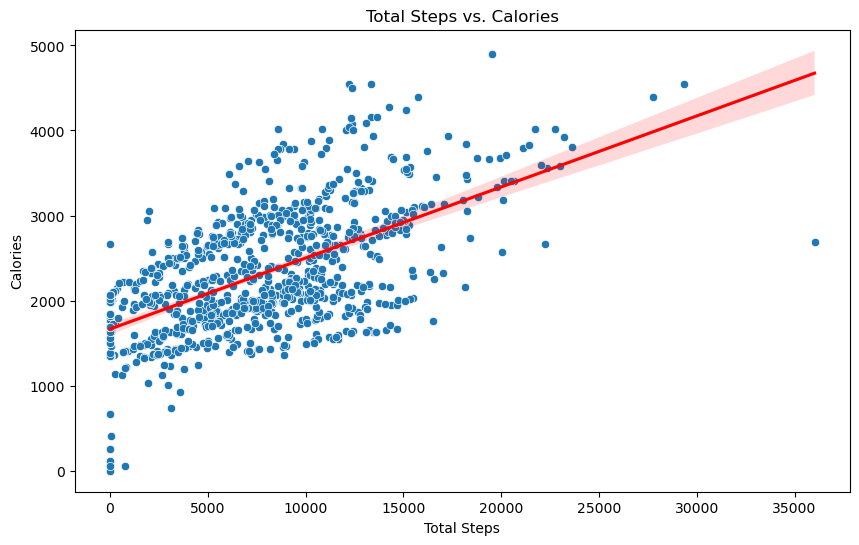

In [29]:
# plot graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSteps', y='Calories', data=activity)
sns.regplot(x='TotalSteps', y='Calories', data=activity, scatter=False, line_kws={'color': 'red'})
plt.title('Total Steps vs. Calories')
plt.xlabel('Total Steps')
plt.ylabel('Calories')

# show plot 
plt.show()

In [30]:
# a possitive corelation between total steps and calories
# the more active a person is the more calories they burn

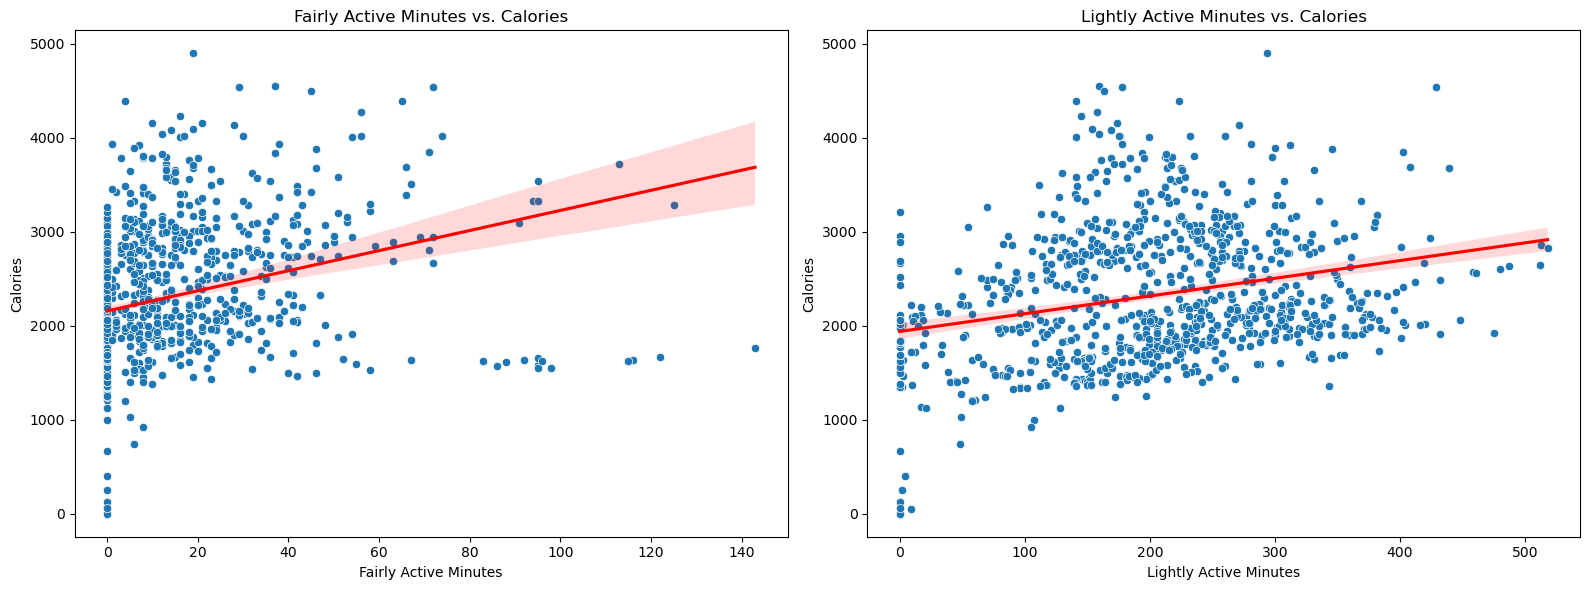

In [31]:
# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot first graph (Fairly Active Minutes vs. Calories)
sns.scatterplot(x='FairlyActiveMinutes', y='Calories', data=activity, ax=axs[0])
sns.regplot(x='FairlyActiveMinutes', y='Calories', data=activity, scatter=False, line_kws={'color': 'red'}, ax=axs[0])
axs[0].set_title('Fairly Active Minutes vs. Calories')
axs[0].set_xlabel('Fairly Active Minutes')
axs[0].set_ylabel('Calories')

# Plot second graph (Lightly Active Minutes vs. Calories)
sns.scatterplot(x='LightlyActiveMinutes', y='Calories', data=activity, ax=axs[1])
sns.regplot(x='LightlyActiveMinutes', y='Calories', data=activity, scatter=False, line_kws={'color': 'red'}, ax=axs[1])
axs[1].set_title('Lightly Active Minutes vs. Calories')
axs[1].set_xlabel('Lightly Active Minutes')
axs[1].set_ylabel('Calories')


# Show plots
plt.tight_layout()
plt.show()

In [32]:
# fairly active minutes shows an upward trend line still while lightly active minutes starts to flatten
# which shows that as the number of active minutes decreases, the number of calories burned tends to decrease 
# this interpretation aligns with the common understanding that physical activity tends to increase calorie expidenture

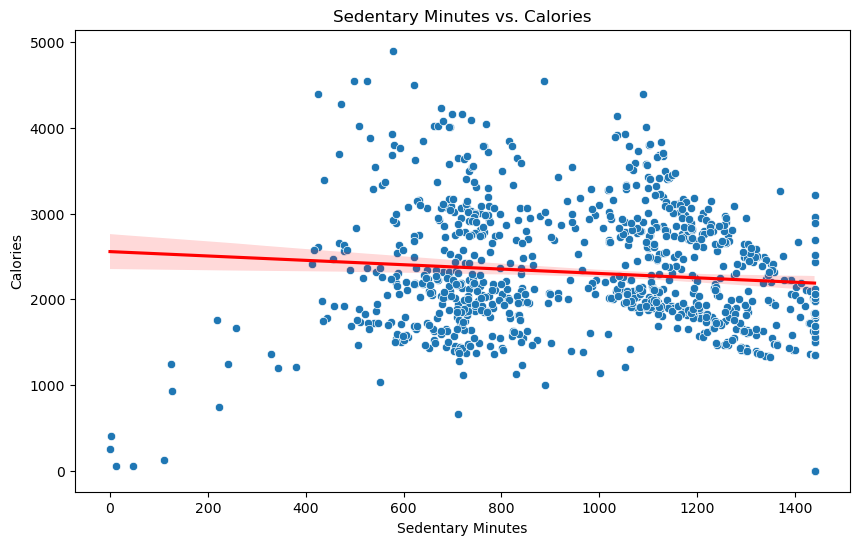

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SedentaryMinutes', y='Calories', data=activity)
sns.regplot(x='SedentaryMinutes', y='Calories', data=activity, scatter=False, line_kws={'color': 'red'})
plt.title('Sedentary Minutes vs. Calories')
plt.xlabel('Sedentary Minutes')
plt.ylabel('Calories')
plt.show()

In [34]:
# sedentary minutes starts to indicate a negative correlation
# as the number of sedentary minutes increases the number of calories burned decreases

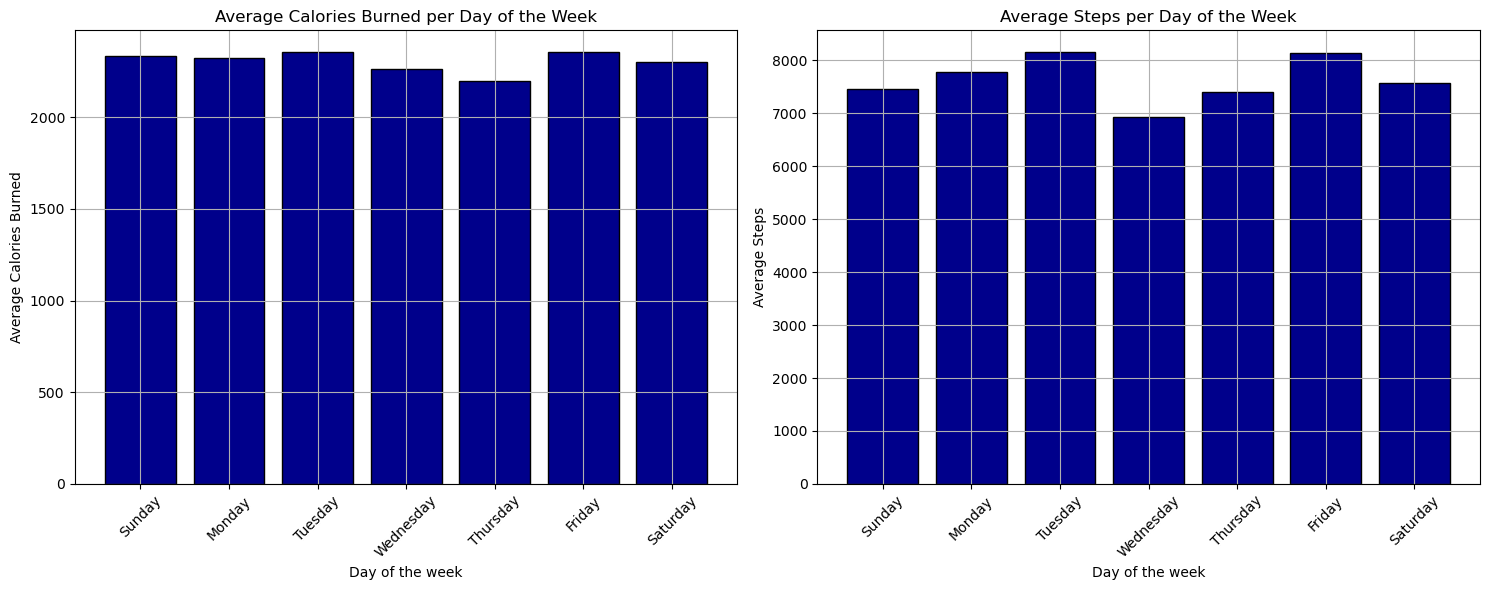

In [35]:
# Group by 'DayOfWeek' and calculate the mean of 'Calories' and 'TotalSteps' for each day
calories_per_day = activity.groupby('DayOfWeek')['Calories'].mean()
steps_per_day = activity.groupby('DayOfWeek')['TotalSteps'].mean()

# Plotting the histograms side by side
plt.style.use("default")
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Create subplots with 1 row and 2 columns

# Plotting the first subplot (Average Calories Burned per Day of the Week)
axs[0].bar(calories_per_day.index, calories_per_day, color="darkblue", edgecolor="black")
axs[0].set_xlabel("Day of the week")
axs[0].set_ylabel("Average Calories Burned")
axs[0].set_title("Average Calories Burned per Day of the Week")
axs[0].grid(True)
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axs[0].set_xticks(range(len(weekday_order)))  # Set the x-axis ticks
axs[0].set_xticklabels(weekday_order)  # Set the x-axis tick labels

# Plotting the second subplot (Average Steps per Day of the Week)
axs[1].bar(steps_per_day.index, steps_per_day, color="darkblue", edgecolor="black")
axs[1].set_xlabel("Day of the week")
axs[1].set_ylabel("Average Steps")
axs[1].set_title("Average Steps per Day of the Week")
axs[1].grid(True)
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axs[1].set_xticks(range(len(weekday_order)))  # Set the x-axis ticks
axs[1].set_xticklabels(weekday_order)  # Set the x-axis tick labels

plt.tight_layout()  # Adjust layout to prevent overlapping of subplots
plt.show()

In [36]:
# average Caloroies burned per day stay consitent thoughout the week with wednesday and Saturday having the highest calories burned and thursday the lowest 
# which reflects the average number of steps per day though out the week
# more steps equels more calories burned

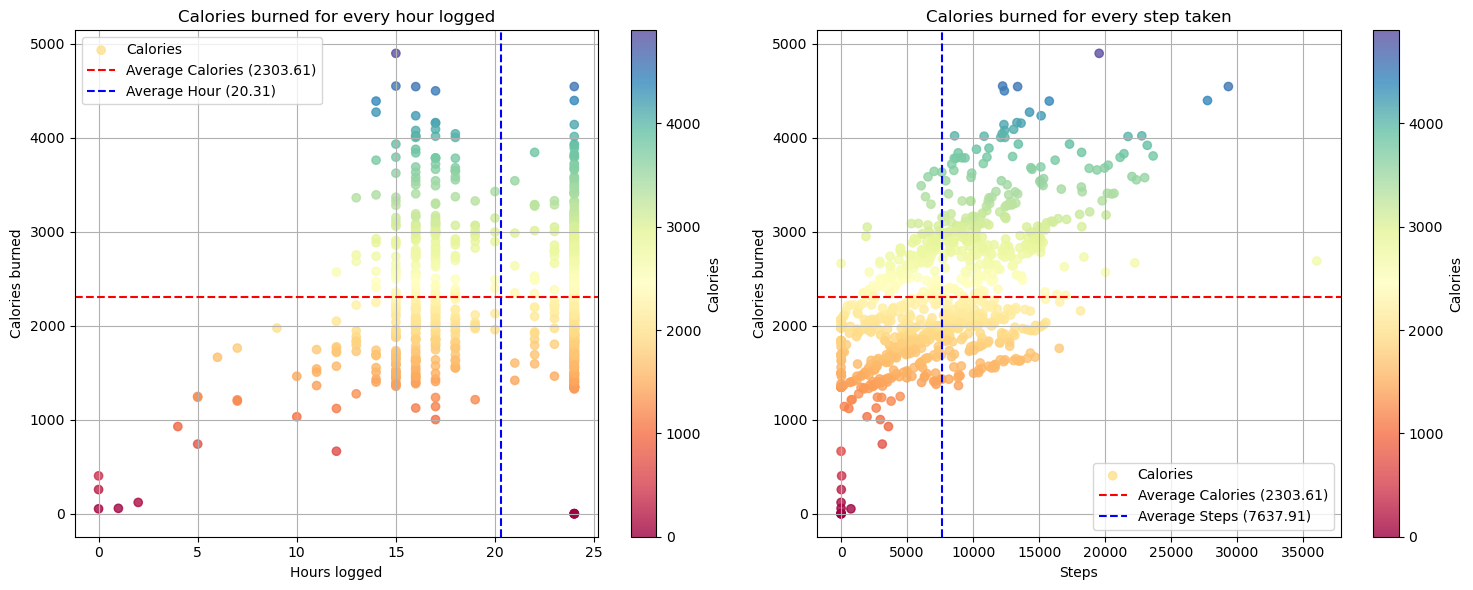

In [37]:
# Calculate average calories and average hour for both plots
avg_calories_hour = activity['Calories'].mean()
avg_hour = activity['TotalHours'].mean()

avg_calories_steps = activity['Calories'].mean()
avg_steps = activity['TotalSteps'].mean()

# Plotting the scatter plots side by side
plt.style.use("default")
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Create subplots with 1 row and 2 columns

# Plotting the first subplot (Calories burned for every hour logged)
sc1 = axs[0].scatter(activity['TotalHours'], activity['Calories'], 
                     alpha=0.8, c=activity['Calories'], 
                     cmap='Spectral', label='Calories')
axs[0].axhline(avg_calories_hour, color='red', linestyle='--', label=f'Average Calories ({avg_calories_hour:.2f})')
axs[0].axvline(avg_hour, color='blue', linestyle='--', label=f'Average Hour ({avg_hour:.2f})')
axs[0].set_xlabel("Hours logged")
axs[0].set_ylabel("Calories burned")
axs[0].set_title("Calories burned for every hour logged")
axs[0].legend()
axs[0].grid(True)

# Plotting the second subplot (Calories burned for every step taken)
sc2 = axs[1].scatter(activity['TotalSteps'], activity['Calories'], 
                     alpha=0.8, c=activity['Calories'], 
                     cmap='Spectral', label='Calories')
axs[1].axhline(avg_calories_steps, color='red', linestyle='--', label=f'Average Calories ({avg_calories_steps:.2f})')
axs[1].axvline(avg_steps, color='blue', linestyle='--', label=f'Average Steps ({avg_steps:.2f})')
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("Calories burned")
axs[1].set_title("Calories burned for every step taken")
axs[1].legend()
axs[1].grid(True)

# Add color bar to both plots
cbar1 = fig.colorbar(sc1, ax=axs[0], orientation="vertical", label='Calories')
cbar2 = fig.colorbar(sc2, ax=axs[1], orientation="vertical", label='Calories')

plt.tight_layout()  # Adjust layout to prevent overlapping of subplots
plt.show()


In [38]:
# Calories burned for every hour logged shows a weak correlation whereby the increase of hours logged does not neccessarily burn more calories 
# intensity of calories burned ranges from 15- 24 hours
# on the other hand Calories burned for every step taken does show a possitve correlation 
# the increase in steps shows a high calorie burn intensity

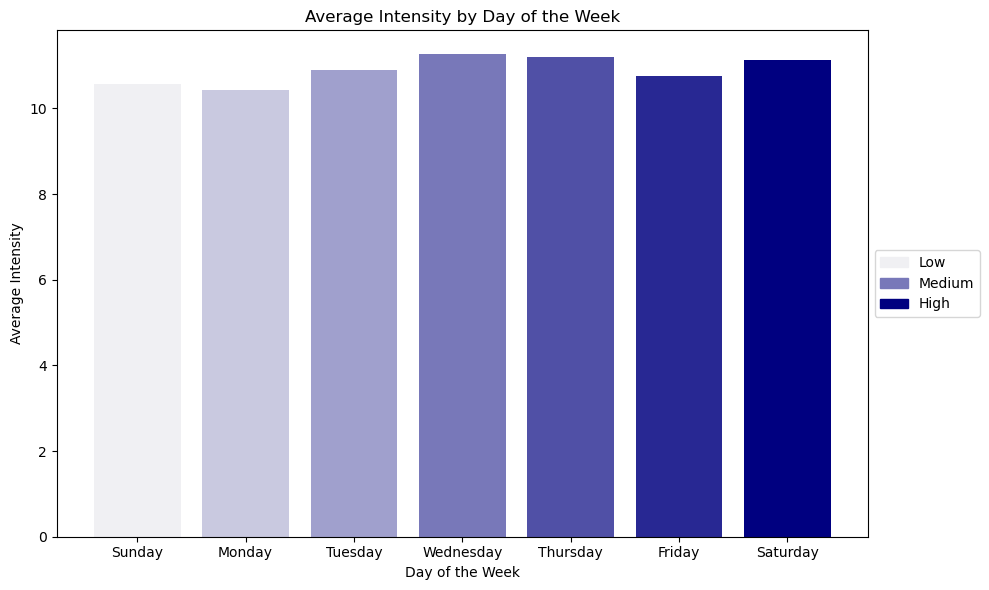

In [39]:
# Convert 'Weekday' column to categorical with specified order
hourly_merged['DayOfWeek'] = pd.Categorical(hourly_merged['DayOfWeek'], categories=weekday_order, ordered=True)

# Pivot the data to have weekday on the y-axis and hour on the x-axis
heatmap_data = hourly_merged.pivot_table(index='DayOfWeek', columns='Hour', values='TotalIntensity', aggfunc='mean', observed=False)

# Calculate the average intensity for each day of the week
avg_intensity_per_day = heatmap_data.mean(axis=1)

# Sort the average intensity values and get the corresponding weekdays
sorted_avg_intensity = avg_intensity_per_day.loc[weekday_order]

# Define a single color with different tones based on intensity
color_palette = sns.light_palette("navy", len(sorted_avg_intensity))

# Plot the bar chart with colored bars
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_avg_intensity.index, sorted_avg_intensity, color=color_palette)

# Create custom legend with color patches representing intensity levels
legend_labels = ['Low', 'Medium', 'High']  # Customize legend labels as needed
legend_colors = [color_palette[0], color_palette[len(color_palette) // 2], color_palette[-1]]
legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]

# Add legend outside of the graph
plt.legend(legend_patches, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Average Intensity')
plt.title('Average Intensity by Day of the Week')

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
# Friday and Saturday shows the most active days, likely due to more free time and enjoying the start of the weekend
# Sunday shows the least active day, like due to relaxing from the activities the days before and since monday is the start of the work week again. people want to relax.

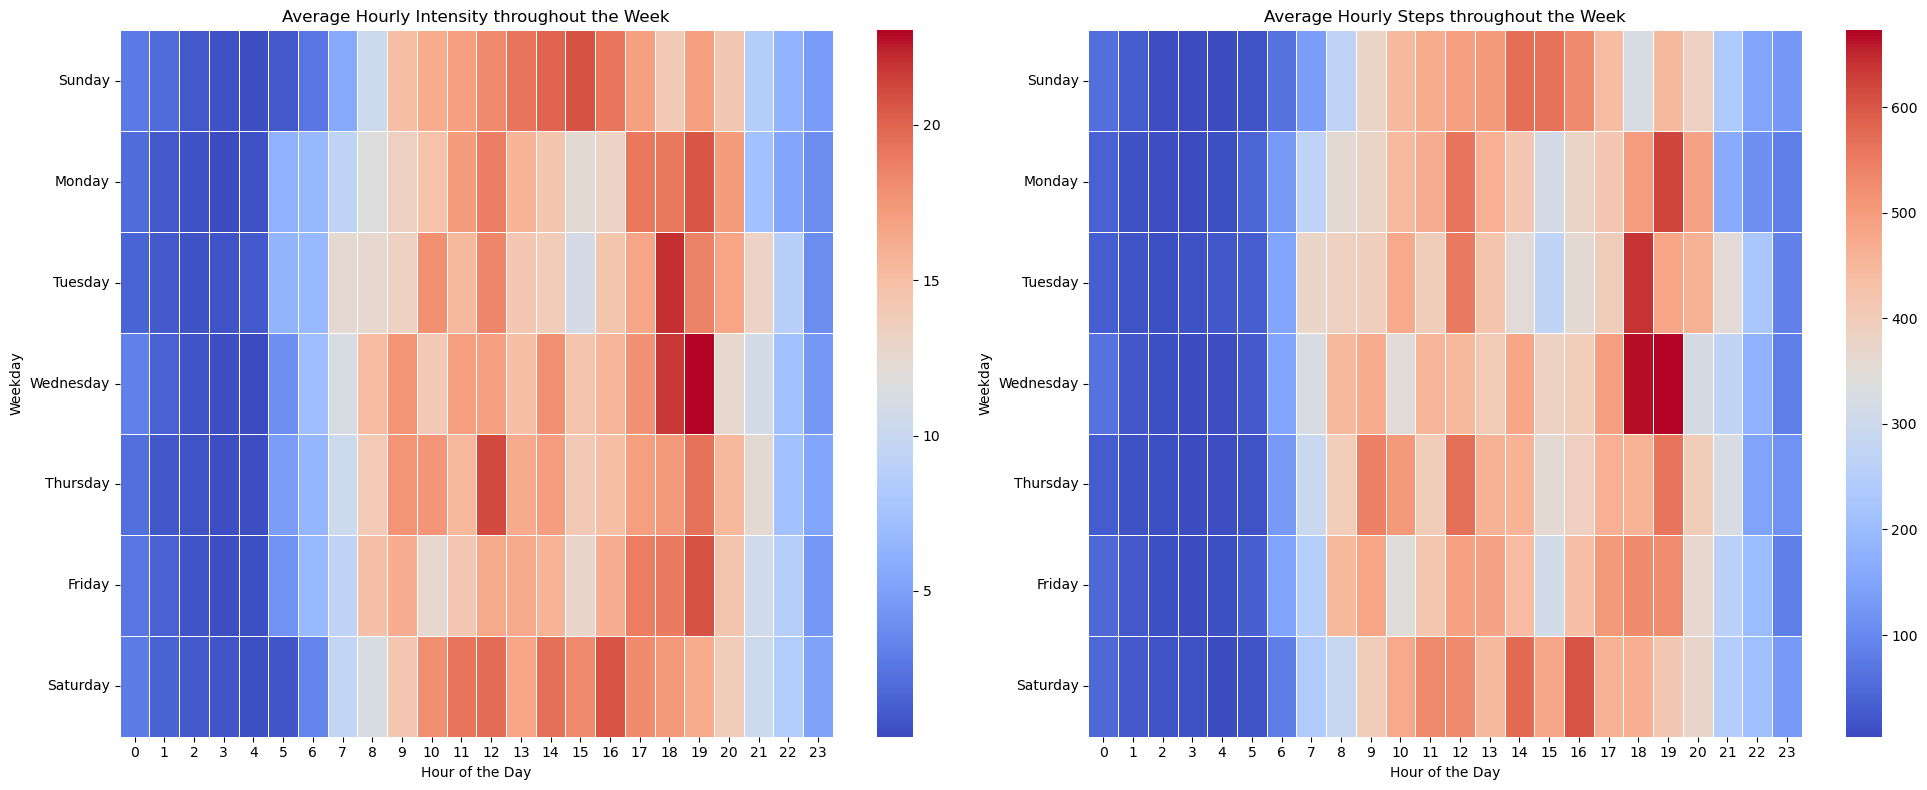

In [41]:
# Pivot the data to have weekday on the y-axis and hour on the x-axis
heatmap_intensity_data = hourly_merged.pivot_table(index='DayOfWeek', columns='Hour', values='TotalIntensity', aggfunc='mean', observed=False)
heatmap_steps_data = hourly_merged.pivot_table(index='DayOfWeek', columns='Hour', values='StepTotal', aggfunc='mean', observed=False)

# Plotting both heatmaps side by side
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.heatmap(heatmap_intensity_data, cmap='coolwarm', linewidths=0.5)
plt.title('Average Hourly Intensity throughout the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Weekday')
plt.yticks(rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(heatmap_steps_data, cmap='coolwarm', linewidths=0.5)
plt.title('Average Hourly Steps throughout the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Weekday')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


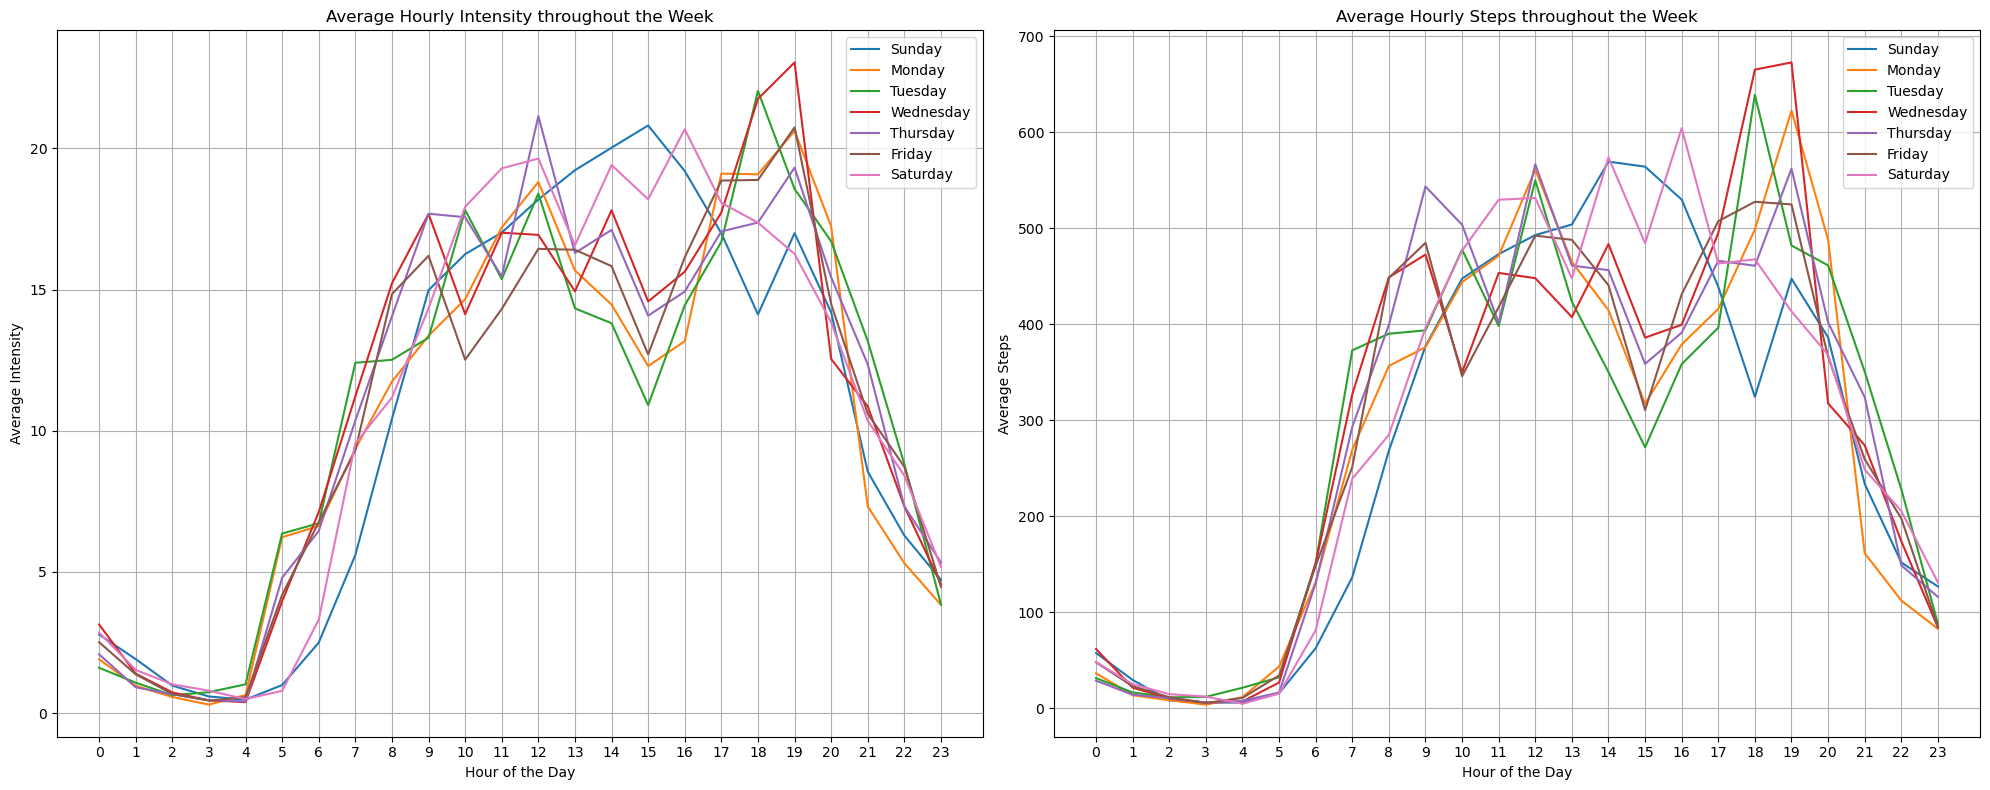

In [42]:
# Pivot the data to have weekday on the y-axis and hour on the x-axis for intensity
heatmap_intensity_data = hourly_merged.pivot_table(index='DayOfWeek', columns='Hour', values='TotalIntensity', aggfunc='mean', observed=False)

# Pivot the data to have weekday on the y-axis and hour on the x-axis for steps
heatmap_steps_data = hourly_merged.pivot_table(index='DayOfWeek', columns='Hour', values='StepTotal', aggfunc='mean', observed=False)

# Plotting both line graphs side by side
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
for day in heatmap_intensity_data.index:
    plt.plot(heatmap_intensity_data.columns, heatmap_intensity_data.loc[day], label=day)

plt.title('Average Hourly Intensity throughout the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Intensity')
plt.xticks(range(24))
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for day in heatmap_steps_data.index:
    plt.plot(heatmap_steps_data.columns, heatmap_steps_data.loc[day], label=day)

plt.title('Average Hourly Steps throughout the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Steps')
plt.xticks(range(24))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

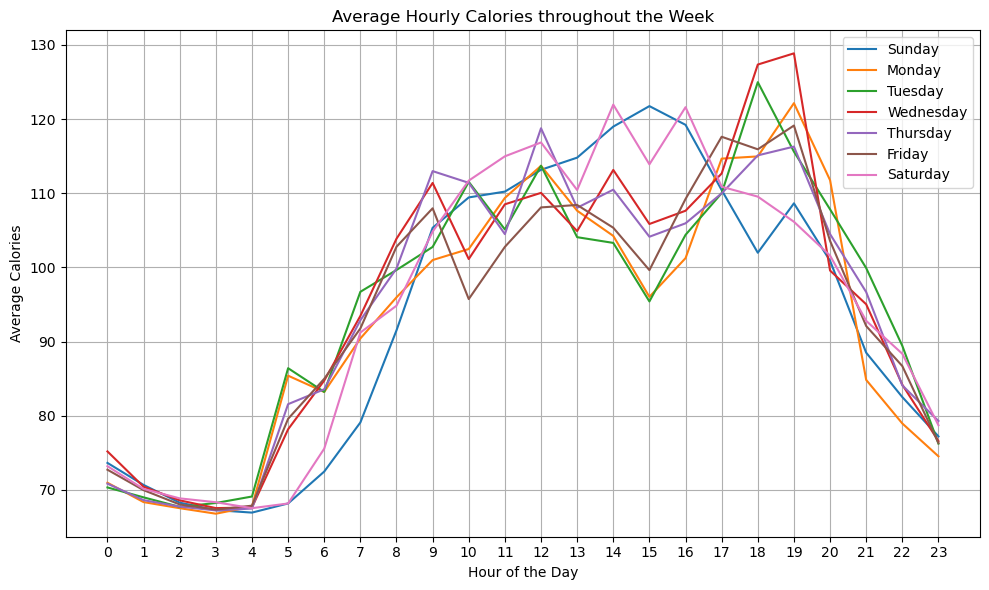

In [43]:
# Pivot the data to have weekday on the y-axis and hour on the x-axis for calories
heatmap_calories_data = hourly_merged.pivot_table(index='DayOfWeek', columns='Hour', values='Calories', aggfunc='mean', observed=False)

# Plotting the line graph for average hourly calories throughout the week
plt.figure(figsize=(10, 6))
for day in heatmap_calories_data.index:
    plt.plot(heatmap_calories_data.columns, heatmap_calories_data.loc[day], label=day)

plt.title('Average Hourly Calories throughout the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Calories')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

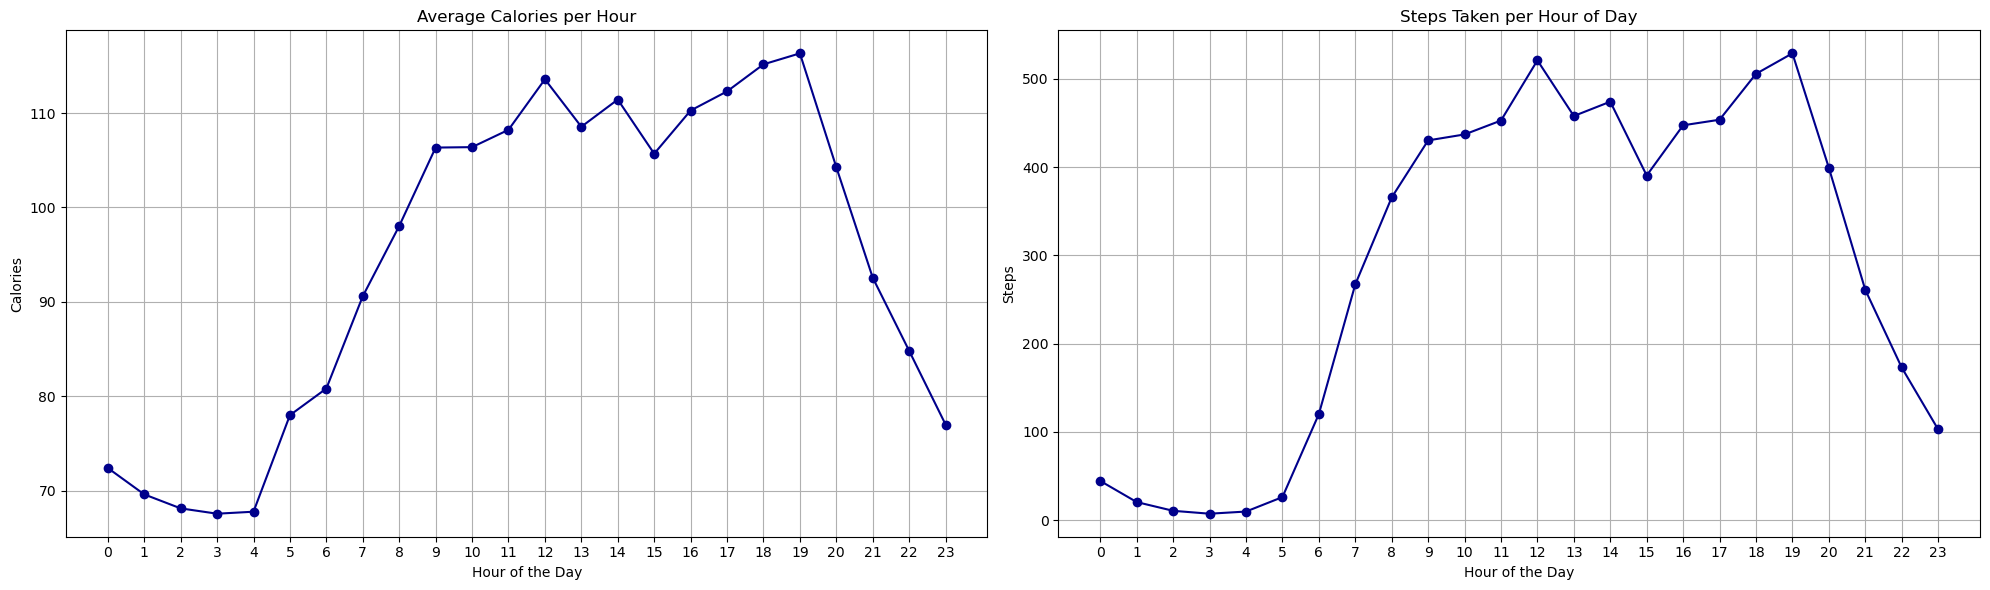

In [44]:
# Group by 'Hour' and calculate mean 'Calories' for each hour
calories_time = hourly_merged.groupby('Hour')['Calories'].mean().reset_index()

# Group by 'Hour' and calculate mean 'StepTotal' for each hour
steps_time = hourly_merged.groupby('Hour')['StepTotal'].mean().reset_index()

# Plotting both line charts side by side
plt.figure(figsize=(20, 6))

# Plotting the first subplot (Average Calories per Hour)
plt.subplot(1, 2, 1)
plt.plot(calories_time['Hour'], calories_time['Calories'], color='darkblue', marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Calories')
plt.title('Average Calories per Hour')
plt.xticks(range(24))  # Set x-ticks to range from 0 to 23
plt.grid(True)

# Plotting the second subplot (Steps Taken per Hour of Day)
plt.subplot(1, 2, 2)
plt.plot(steps_time['Hour'], steps_time['StepTotal'], color='darkblue', marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Steps')
plt.title('Steps Taken per Hour of Day')
plt.xticks(range(24))  # Set x-ticks to range from 0 to 23
plt.grid(True)

plt.tight_layout()
plt.show()


In [45]:
# consistent trends are seen relating to hourly average of calories, steps and intensity
# hourly averages peak on wednesdays around 18:00
# sunday average calories peak at 15:00 which reflects intensity and steps
# sunday activity begins later than all other days
# while saturday average calories peak 14:00 and 16:00 
# on saturdays intenstity and steps peak at 16:00
# on average 12pm and 19pm is peak activity since it is during lunch hours and the end of the work day

In [46]:
# summary of findings
# Average metrics
# The average calories burned hourly is 94.2, with an average StepTotal of 286.2 per hour and an average TotalIntensity of 10.8 minutes per hour.
# The majority of users are not active, with only 15.8% being lightly active and 1.7% very active. This suggests that the app may not be primarily used for fitness tracking but for monitoring daily habits.

# Usage patterns
# Participants tend to use the Fitbit more during the midweek, with usage dropping at the start of the weekend. This indicates that users are less focused on logging into the app during their days off.
# Fitbit usage is more common during the workweek, suggesting that it's used for tracking daily habits and activities during work and commutes.

# activite levels 
# Activity levels remain consistent throughout the week, with sedentary behavior dominating every day. There is a positive correlation between total steps and calories burned, indicating that more steps result in more calories burned.
# Fairly active minutes show an upward trend line, while lightly active minutes start to flatten, suggesting that as the number of active minutes decreases, the number of calories burned tends to decrease.

# Daily Trends
# Average calories burned per day stay consistent throughout the week, with Wednesday and Saturday having the highest calories burned and Thursday the lowest.
# Sunday shows the least active day, likely due to relaxation after activities on the days before, and Monday being the start of the workweek again.

# conclusion and recommendations
# The data suggests that while users engage with the Fitbit app regularly, their activity levels vary, with sedentary behavior being predominant.
# To improve lifestyle and activity levels, users could benefit from personalized reminders and challenges to increase physical activity when participants have been inactive for too long during the day
# The app could offer more features to encourage users to engage in physical activities, such as workout suggestions, personalized goals, and rewards for achieving milestones.
# Suggest personalized workout schedules that would not only meet the recommended amount of activity but also accommodate the participants schedules.
# Additionally, promoting a balanced lifestyle by encouraging breaks during work hours and providing tips for staying active during leisure time could also be beneficial.
# Providing insights into the correlation between activity levels, calories burned, and overall health could motivate users to adopt healthier habits.
# Overall, by providing more personalized and engaging features, the Fitbit app can better support users in leading healthier and more active lifestyles.